# 669 修剪二叉搜索树
输入：给定二叉搜索树的最小边界L和最大边界R  
要求：通过修剪二叉搜索树使得所有节点的值在[L, R]之间  
输出：修剪后二叉搜索树新的根节点  

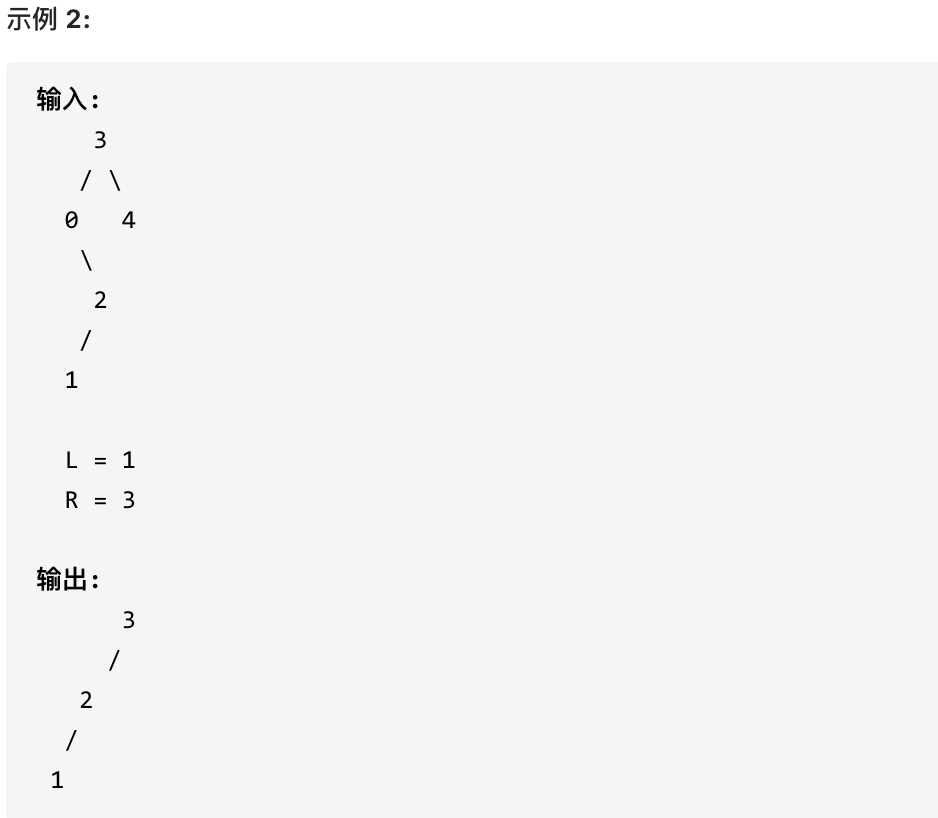

## 思路
很直接的思路是，通过递归，遇到不在区间内的节点return none，也就是修改孩子指针  

但当前节点如果不在区间内，其左右子树却属于区间范围的话就不可行了

解决方法：遇到不符合条件的节点，将其**删除**，然后把其子树嫁接到上一个节点上  

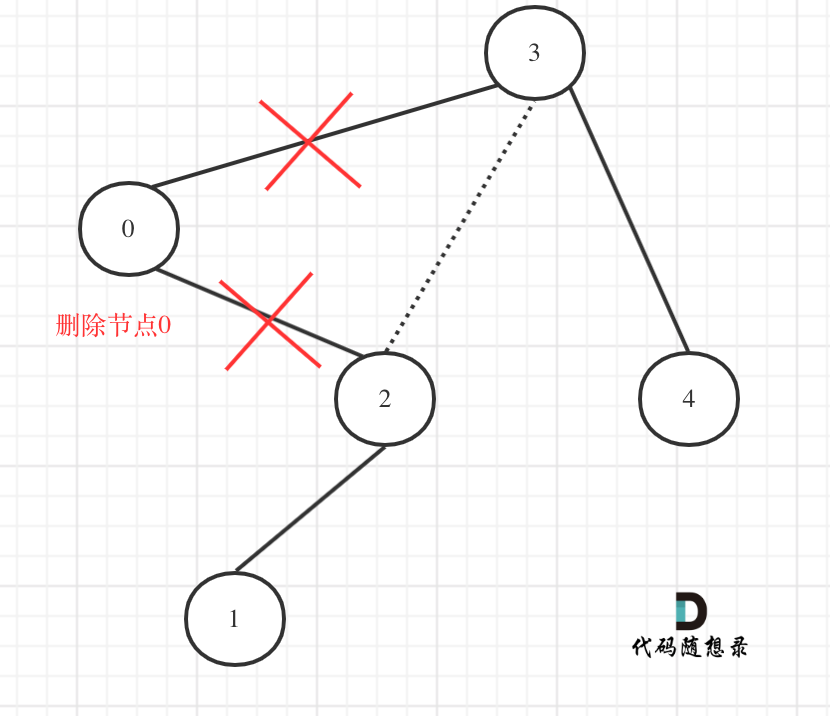

### 递归三部曲
1. 递归参数和返回值：  
   - 参数：根节点，L, H
   - 返回值：有返回值，通过返回值来移除节点

2. 终止条件：
   - 修剪的操作并不是在终止条件上进行的，不是说遇到需要修建的节点就结束递归了  
   - 所以就是遇到空节点返回就可以了  

3. 单层递归逻辑：
    - 如果 root < low: 递归更大的右子树，返回右子树符合条件的头节点，并把返回的结果接住    
    - 如果 root > high: 递归更小的左子树，返回左子树符合条件的的头节点，并把返回的结果接住  
    - 然后把当前节点左右子树递归的结果嫁接到当前节点

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = None
        self.right = None

# 递归法
# 修剪二叉树也就是剪枝
class Solution:
    def trimBST(self, root, low, high):
        if root is None:
            return None
        
        if root.val < low:
            # 右子树符合区间的节点
            return trimBST(root.right, low, high)
        if root.val > high:
            # 寻找左子树符合区间的节点
            return trimBST(root.left, low, high)
        root.left = trimBST(root.left, low, high)  # root.left 嫁接符合条件的左孩子
        root.right = trimBST(root.right, low, high)  # root.right 嫁接符合条件的右孩子
        return root